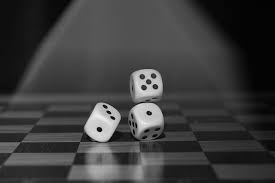

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image1 = cv2.imread("test.jpeg")

cv2_imshow(image1)


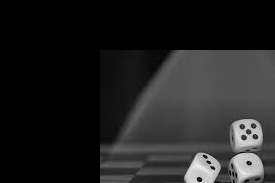

In [ ]:
tx , ty = 100,50
tran_martrix_filter = np.float32([[1,0,tx],[0,1,ty]])
image_translation = cv2.warpAffine(image1,tran_martrix_filter,(image1.shape[1],image1.shape[0]))
cv2_imshow(image_translation)

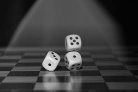

In [ ]:
scale_img = cv2.resize(image1,None, fx=0.5,fy=0.5)
cv2_imshow(scale_img)

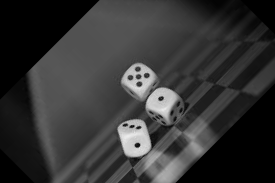

In [ ]:
(h,w) = image1.shape[:2]
center = (w//2,h//2)
M = cv2.getRotationMatrix2D(center,45,1.0)
rotated = cv2.warpAffine(image1,M,(w,h))
cv2_imshow(rotated)

In [ ]:
def translation_martix(tx,ty,tz):
    return np.array([[1,0,0,tx],[0,1,0,ty],[0,0,0,tz],[0,0,0,1]],dtype=np.float32)

def scale_martix(sx,sy,sz):
    return np.array([[sx,0,0,0],[0,sy,0,0],[0,0,sz,0],[0,0,0,1]],dtype=np.float32)

def rotationX_martix(angle):
    c=np.cos(np.radians(angle))
    s=np.sin(np.radians(angle))
    return np.array([[1,0,0,0],[0,c,-s,0],[0,s,c,0],[0,0,0,1]],dtype=np.float32)

def rotationY_martix(angle):
    c=np.cos(np.radians(angle))
    s=np.sin(np.radians(angle))
    return np.array([[c,0,s,0],[0,1,0,0],[-s,0,c,0],[0,0,0,1]],dtype=np.float32)

def rotationZ_martix(angle):
    c=np.cos(np.radians(angle))
    s=np.sin(np.radians(angle))
    return np.array([[c,-s,0,0],[s,c,0,0],[0,0,1,0],[0,0,0,1]],dtype=np.float32)

In [ ]:
def apply_transformation(point,martix):
    homogen_point = np.array([point[0],point[1],point[2],1],dtype=np.float32)
    transformed_point = np.dot(martix,homogen_point)
    return transformed_point[:3]

sample_point = np.array([10,10,1],dtype=np.float32);
print(sample_point)

[10. 10.  1.]


In [ ]:
translation = translation_martix(2,3,4)
print(apply_transformation(sample_point,translation))

[12. 13.  4.]


In [ ]:
scale = scale_martix(3,3,3)
print(apply_transformation(sample_point,scale))

[30. 30.  3.]


In [ ]:
rotatedX = rotationX_martix(45)
print(apply_transformation(sample_point,rotatedX))

[10.         6.363961   7.7781744]


In [ ]:
rotatedY = rotationY_martix(45)
print(apply_transformation(sample_point,rotatedY))

[ 7.7781744 10.        -6.363961 ]


In [ ]:
rotatedZ = rotationZ_martix(45)
print(apply_transformation(sample_point,rotatedZ))

[ 0.       14.142136  1.      ]
